In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import numpy as np
from selenium.webdriver import ActionChains

In [2]:
!pip install selenium

In [3]:
!pip install webdriver_manager

In [17]:
from webdriver_manager.chrome import ChromeDriverManager

In [18]:
from selenium import webdriver

In [19]:
url = "https://www.ox2.com/projects/"
requests.get(url)

<Response [200]>

In [23]:
## First soup - "In Operation" & "Sweden"

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://www.ox2.com/projects/"
driver.get(url)
time.sleep(1)

# press "I Understand"-button
understand_button = driver.find_element_by_xpath('/html/body/div[1]/div/div/div[2]/a')
understand_button.click()
time.sleep(2)

# select Phase = "In Operation"
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[1]/div').click()
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[1]/div/ul/li[4]').click()
time.sleep(2)

# select Region = "Sweden"
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[2]/div').click()
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[2]/div/ul/li[2]').click()
time.sleep(2)

while True:
    # scroll down to "Load more"-button and click it
    try:
        actions = ActionChains(driver)
        element = driver.find_element_by_xpath('//*[@id="searchresults"]/button')
        actions.move_to_element(element).perform()
        time.sleep(1)
        element.click()
        time.sleep(5)

    # if error, then break out of the loop and soup the page
    except:
        soup = bs(driver.page_source)
        break

container = soup.select('project-card')
country = []
project_name = []
municipality = []
turbines = []
height = []
production = []
start_yr = []
owner = []
supplier = []

for i in container:
    
    # Country
    country.append("Sweden")
    
    # Project name
    name = [i.text for i in i.select('a:nth-child(2) > h3:nth-child(1)')]
    if name:
        project_name.append(name[0])
    else:
        project_name.append(np.nan)
    
    # Municipality
    mun = [i.text for i in i.select('table > tbody > tr:nth-child(1) > td')]
    if mun:
        municipality.append(mun[0])
    else:
        municipality.append(np.nan)
        
    # Number of turbines
    wtg = [i.text for i in i.select('table > tbody > tr:nth-child(2) > td')]
    if wtg:
        turbines.append(wtg[0])
    else:
        turbines.append(np.nan)
        
    # Total height
    h = [i.text for i in i.select('table > tbody > tr:nth-child(3) > td')]
    if h:
        height.append(h[0])
    else:
        height.append(np.nan)
    
    # Annual production
    p = [i.text for i in i.select('table > tbody > tr:nth-child(4) > td')]
    if p:
        production.append(p[0])
    else:
        production.append(np.nan)
        
    # Operations start (COD)
    cod = [i.text for i in i.select('table > tbody > tr:nth-child(5) > td')]
    if cod:
        start_yr.append(cod[0])
    else:
        start_yr.append(np.nan)
        
    # Owner
    o = [i.text for i in i.select('table > tbody > tr:nth-child(6) > td')]
    if o:
        owner.append(o[0])
    else:
        owner.append(np.nan)
    
    # WTG Supplier
    sup = [i.text for i in i.select('table > tbody > tr:nth-child(7) > td')]
    if sup:
        supplier.append(sup[0])
    else:
        supplier.append(np.nan)
        
df_swe = pd.DataFrame({"Country":country, 
                       "Project name":project_name, 
                       "Municipality":municipality, 
                       "# Turbines":turbines,
                       "Total height":height,
                       "Annual production":production,
                       "Operations start":start_yr,
                       "Owner":owner,
                       "WTG supplier":supplier})
df_swe



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\robin.falconer\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


,Country,Project name,Municipality,# Turbines,Total height,Annual production,Operations start,Owner,WTG supplier
0,Sweden,Åmot-Lingbo och Tönsen vindparker (Valhalla),Ockelbo and Bollnäs,85 V136 4.3 MW,180 m,"1,1 TWh",2020,Vestas,NaN
1,Sweden,Bondön,Piteå\t,7 (of 14),125 m,,2008,Fontavis (7 of 14),Nordex
2,Sweden,Rödstahöjden,Sollefteå,6,150 m,57 GWh,2015,"Finja Energi, Eskilstuna Vindkraft",Vestas
3,Sweden,Lehtirova,Gällivare och Pajala,41,184 m,490 GWh,2018,Aquila Capital,Vestas
4,Sweden,Brahehus,Jönköping,4 (of 9),150 m,56 GWh,2011,Partillebo,Siemens
5,Sweden,Glötesvålen,Härjedalen,30,125 m,220 GWh,2014,IKEA,Vestas
6,Sweden,Råshön,Krokom,1 (of 8),125 m,6 GWh,2009,Solivind El Ek för,Vestas
7,Sweden,Maevaara,Pajala and Övertorneå,34,"178,5/180 m",359 GWh,2015/2016,Allianz Capital Partners,"Nordex, Vestas"
8,Sweden,Svegström (Brickan),Härjedalen,1,125 m,6 GWh,2008,Solivind El Ek för,Vestas
9,Sweden,Fallåsberget,Ockelbo,10,150 m,75 GWh,2013,"Solivind El Ekonomisk Förening, SGS Studentbos...",Siemens


In [25]:
## Second soup - "In Operation" & "Finland"

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://www.ox2.com/projects/"
driver.get(url)
time.sleep(1)

# press "I Understand"-button
understand_button = driver.find_element_by_xpath('/html/body/div[1]/div/div/div[2]/a')
understand_button.click()
time.sleep(2)

# select Phase = "In Operation"
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[1]/div').click()
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[1]/div/ul/li[4]').click()
time.sleep(2)

# select Region = "Finland"
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[2]/div').click()
driver.find_element_by_xpath('//*[@id="main"]/section[1]/div/div[1]/div/form/div[2]/div/ul/li[3]').click()
time.sleep(2)

while True:
    # scroll down to "Load more"-button and click it
    try:
        actions = ActionChains(driver)
        element = driver.find_element_by_xpath('//*[@id="searchresults"]/button')
        actions.move_to_element(element).perform()
        time.sleep(1)
        element.click()
        time.sleep(5)

    # if error, then break out of the loop and soup the page
    except:
        soup = bs(driver.page_source)
        break

container = soup.select('project-card')
country = []
project_name = []
municipality = []
turbines = []
height = []
production = []
start_yr = []
owner = []
supplier = []

for i in container:
    
    # Country
    country.append("Finland")
    
    # Project name
    name = [i.text for i in i.select('a:nth-child(2) > h3:nth-child(1)')]
    if name:
        project_name.append(name[0])
    else:
        project_name.append(np.nan)
    
    # Municipality
    mun = [i.text for i in i.select('table > tbody > tr:nth-child(1) > td')]
    if mun:
        municipality.append(mun[0])
    else:
        municipality.append(np.nan)
        
    # Number of turbines
    wtg = [i.text for i in i.select('table > tbody > tr:nth-child(2) > td')]
    if wtg:
        turbines.append(wtg[0])
    else:
        turbines.append(np.nan)
        
    # Total height
    h = [i.text for i in i.select('table > tbody > tr:nth-child(3) > td')]
    if h:
        height.append(h[0])
    else:
        height.append(np.nan)
    
    # Annual production
    p = [i.text for i in i.select('table > tbody > tr:nth-child(4) > td')]
    if p:
        production.append(p[0])
    else:
        production.append(np.nan)
        
    # Operations start (COD)
    cod = [i.text for i in i.select('table > tbody > tr:nth-child(5) > td')]
    if cod:
        start_yr.append(cod[0])
    else:
        start_yr.append(np.nan)
        
    # Owner
    o = [i.text for i in i.select('table > tbody > tr:nth-child(6) > td')]
    if o:
        owner.append(o[0])
    else:
        owner.append(np.nan)
    
    # WTG Supplier
    sup = [i.text for i in i.select('table > tbody > tr:nth-child(7) > td')]
    if sup:
        supplier.append(sup[0])
    else:
        supplier.append(np.nan)
        
df_fin = pd.DataFrame({"Country":country, 
                       "Project name":project_name, 
                       "Municipality":municipality, 
                       "# Turbines":turbines,
                       "Total height":height,
                       "Annual production":production,
                       "Operations start":start_yr,
                       "Owner":owner,
                       "WTG supplier":supplier})
df_fin



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\robin.falconer\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


,Country,Project name,Municipality,# Turbines,Total height,Annual production,Operations start,Owner,WTG supplier
0,Finland,Ponsivuori,Kurikka,7,210 m,100 GWh,2020,IKEA,Nordex
1,Finland,Jouttikallio,Lappo,6,210 m,63 GWh,2016,Allianz,Vestas
2,Finland,Posio,Posio,7,200 m,80 GWh,2016,Encavis,Vestas
3,Finland,Ykspihlaja,Kokkola,4,220 m,55 GWh,2018,Aquila Capital,Nordex
4,Finland,Ajos,Kemi,13,150 m,160 GWh,2016/2017,IKEA,Siemens
5,Finland,Långmossa,Malax,7 N149/4.0-4.5,230 m,110 GWh,2020,IKEA Finland,Nordex


In [59]:
# Creating a dataframe for "In Operation" - including all countries
df_operation = pd.concat([df_swe, df_fin], ignore_index=True)
df_operation.to_csv("df_operation_raw.csv", index=False)

In [65]:
df_operation

,Country,Project name,Municipality,# Turbines,Total height,Annual production,Operations start,Owner,WTG supplier
0,Sweden,Åmot-Lingbo och Tönsen vindparker (Valhalla),Ockelbo and Bollnäs,85 V136 4.3 MW,180,"1,1 TWh",2020,Vestas,NaN
1,Sweden,Bondön,Piteå\t,7 (of 14),125,,2008,Fontavis (7 of 14),Nordex
2,Sweden,Rödstahöjden,Sollefteå,6,150,57 GWh,2015,"Finja Energi, Eskilstuna Vindkraft",Vestas
3,Sweden,Lehtirova,Gällivare och Pajala,41,184,490 GWh,2018,Aquila Capital,Vestas
4,Sweden,Brahehus,Jönköping,4 (of 9),150,56 GWh,2011,Partillebo,Siemens
5,Sweden,Glötesvålen,Härjedalen,30,125,220 GWh,2014,IKEA,Vestas
6,Sweden,Råshön,Krokom,1 (of 8),125,6 GWh,2009,Solivind El Ek för,Vestas
7,Sweden,Maevaara,Pajala and Övertorneå,34,"178,5/180",359 GWh,2015/2016,Allianz Capital Partners,"Nordex, Vestas"
8,Sweden,Svegström (Brickan),Härjedalen,1,125,6 GWh,2008,Solivind El Ek för,Vestas
9,Sweden,Fallåsberget,Ockelbo,10,150,75 GWh,2013,"Solivind El Ekonomisk Förening, SGS Studentbos...",Siemens


In [61]:
df_operation["Total height"] = df_operation["Total height"].str.replace(" m", "")

In [137]:
df_operation["Municipality"] = df_operation["Municipality"].str.replace("\t", "")

In [185]:
df_operation.loc[7, "WTG supplier"] = "Nordex"

In [2]:
df_operation

NameError: name 'df_operation' is not defined

In [147]:
df_operation["Operations start"] = df_operation["Operations start"].astype(int) 

In [153]:
df_operation = df_operation.sort_values("Operations start")

In [157]:
df_operation

,Country,Project name,Municipality,# Turbines,Total height,Annual production (GWh),Operations start,Owner,WTG supplier
1,Sweden,Bondön,Piteå,7,125,NaN,2008,Fontavis,Nordex
8,Sweden,Svegström (Brickan),Härjedalen,1,125,6.0,2008,Solivind El Ek för,Vestas
6,Sweden,Råshön,Krokom,1,125,6.0,2009,Solivind El Ek för,Vestas
12,Sweden,Hedbodberget,Rättvik,15,150,83.0,2010,"Armada kommunfastigheter, Botkyrkabyggen, Mora...",Vestas
4,Sweden,Brahehus,Jönköping,4,150,56.0,2011,Partillebo,Siemens
13,Sweden,Korpfjället,Vansbro och Malung-Sälen,9,150,68.0,2011,IKEA,Siemens
9,Sweden,Fallåsberget,Ockelbo,10,150,75.0,2013,"Solivind El Ekonomisk Förening, SGS Studentbos...",Siemens
5,Sweden,Glötesvålen,Härjedalen,30,125,220.0,2014,IKEA,Vestas
2,Sweden,Rödstahöjden,Sollefteå,6,150,57.0,2015,"Finja Energi, Eskilstuna Vindkraft",Vestas
15,Sweden,Rämsberget,Malung-Sälen,7,175,72.0,2015,IKEA,Vestas


In [156]:
df_operation.to_csv("df_operation_clean.csv", index=False)

In [176]:
df_operation.describe()

,# Turbines,Total height,Annual production (GWh),Operations start
count,25.000000,25.000000,24.000000,25.000000
mean,13.840000,168.720000,161.333333,2015.240000
std,17.918054,33.085143,228.808951,3.875994
min,1.000000,125.000000,6.000000,2008.000000
25%,6.000000,150.000000,62.750000,2013.000000
50%,7.000000,150.000000,78.000000,2016.000000
75%,13.000000,200.000000,160.000000,2018.000000
max,85.000000,230.000000,1100.000000,2020.000000


In [230]:
161/14/3000*1000

3.833333333333333

In [232]:
1100/85/3300*1000

3.9215686274509802

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df_operation = pd.read_csv("df_operation_clean.csv")
df_operation.loc[14, "WTG supplier"] = "Nordex"
df_operation.head()

,Country,Project name,Municipality,# Turbines,Total height,Annual production (GWh),Operations start,Owner,WTG supplier
0,Sweden,Bondön,Piteå,7,125,NaN,2008,Fontavis,Nordex
1,Sweden,Svegström (Brickan),Härjedalen,1,125,6.0,2008,Solivind El Ek för,Vestas
2,Sweden,Råshön,Krokom,1,125,6.0,2009,Solivind El Ek för,Vestas
3,Sweden,Hedbodberget,Rättvik,15,150,83.0,2010,"Armada kommunfastigheter, Botkyrkabyggen, Mora...",Vestas
4,Sweden,Brahehus,Jönköping,4,150,56.0,2011,Partillebo,Siemens


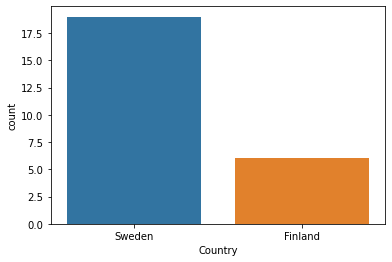

In [163]:
sns.countplot(data=df_operation, x="Country")
plt.show()

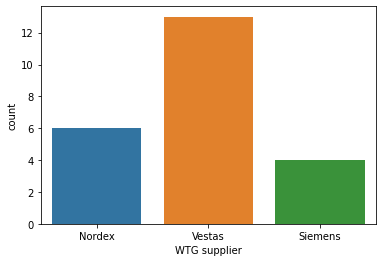

In [233]:
sns.countplot(data=df_operation, x="WTG supplier")
plt.show()

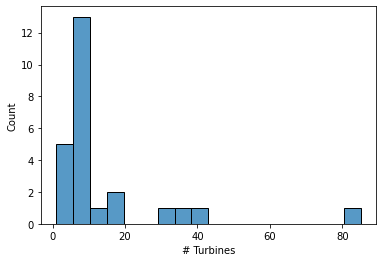

In [188]:
sns.histplot(data=df_operation, x="# Turbines")
plt.show()

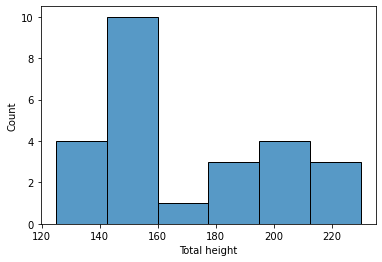

In [164]:
sns.histplot(data=df_operation, x="Total height")
plt.show()

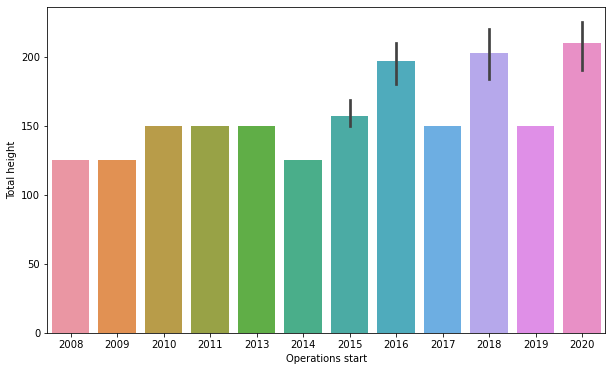

In [168]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_operation, x="Operations start", y="Total height")
plt.show()

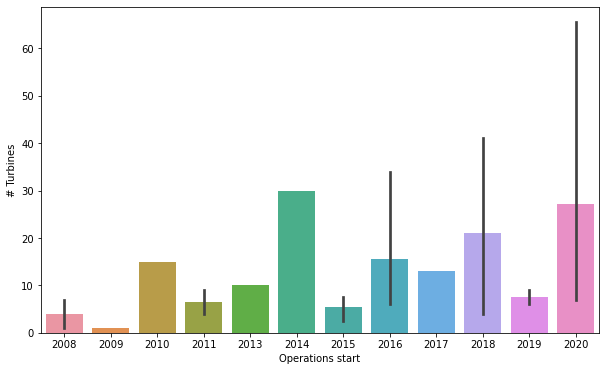

In [175]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_operation, x="Operations start", y="# Turbines")
plt.show()

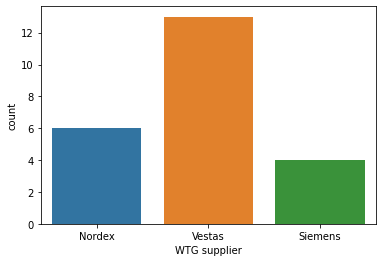

In [187]:
sns.countplot(data=df_operation, x="WTG supplier")
plt.show()

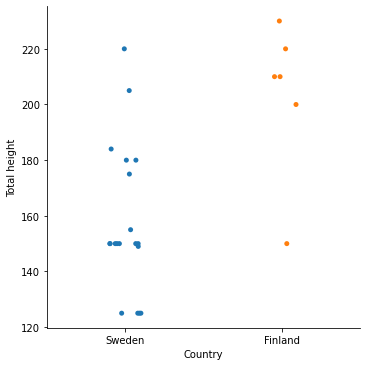

In [189]:
sns.catplot(data=df_operation, x="Country", y="Total height")
plt.show()

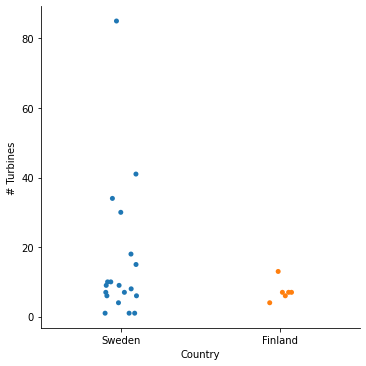

In [191]:
sns.catplot(data=df_operation, x="Country", y="# Turbines")
plt.show()

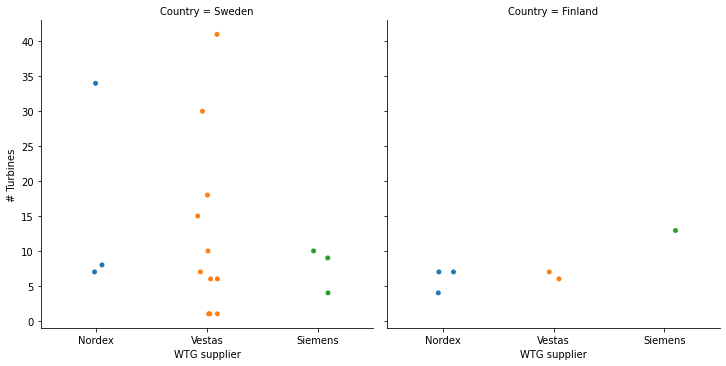

In [50]:
sns.catplot(data=df_operation, x="WTG supplier", y="# Turbines", col="Country")
plt.show()

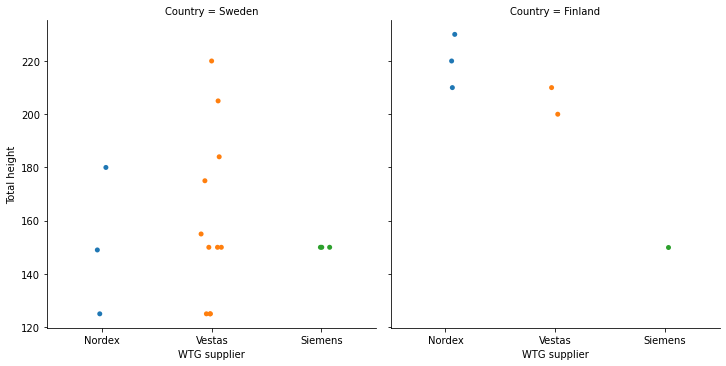

In [49]:
sns.catplot(data=df_operation, x="WTG supplier", y="Total height", col="Country")
plt.show()

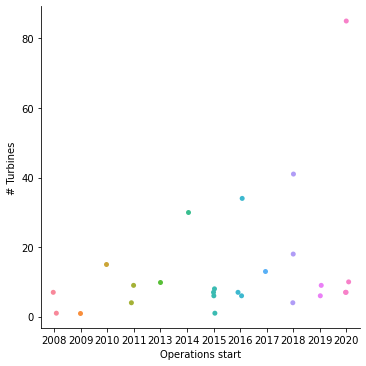

In [201]:
sns.catplot(data=df_operation, x="Operations start", y="# Turbines")
plt.show()

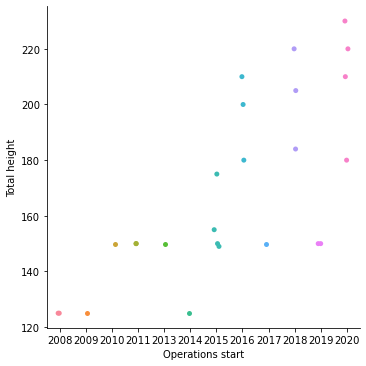

In [203]:
sns.catplot(data=df_operation, x="Operations start", y="Total height")
plt.show()

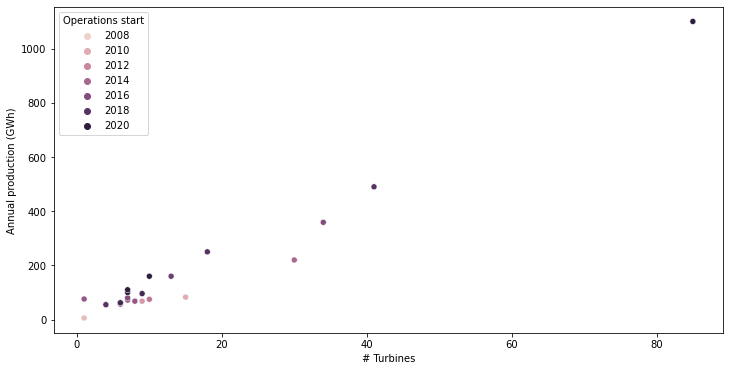

In [213]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_operation, x="# Turbines", y="Annual production (GWh)", hue="Operations start")
plt.show()

In [1]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_operation, x="Total height", y="Annual production (GWh)", hue="Operations start")
plt.show()

NameError: name 'plt' is not defined

<Figure size 864x432 with 0 Axes>

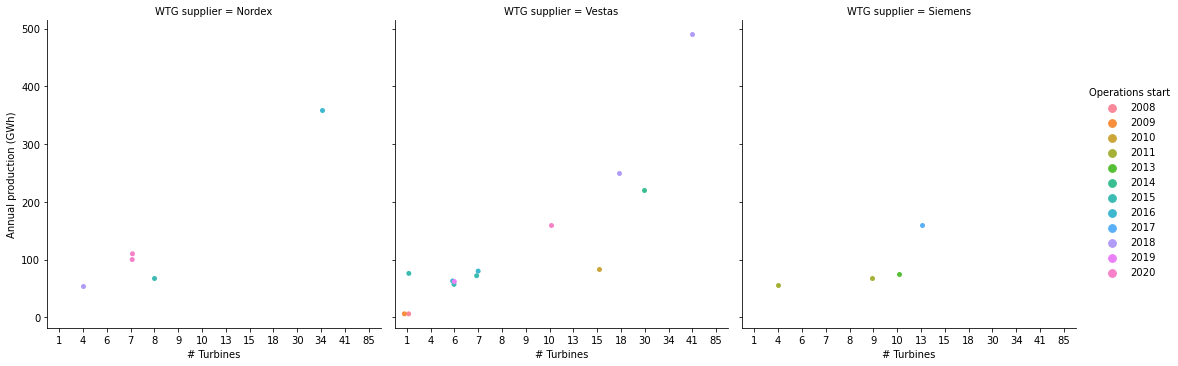

In [220]:
plt.figure(figsize=(12,6))
sns.catplot(data=df_operation, x="# Turbines", y="Annual production (GWh)", hue="Operations start", col="WTG supplier")
plt.show()

In [5]:
df = pd.read_csv("df_operation_clean.csv")

In [27]:
df

,Country,Project name,Municipality,# Turbines,Total height,Annual production (GWh),Operations start,Owner,WTG supplier
0,Sweden,Bondön,Piteå,7,125,NaN,2008,Fontavis,Nordex
1,Sweden,Svegström (Brickan),Härjedalen,1,125,6.0,2008,Solivind El Ek för,Vestas
2,Sweden,Råshön,Krokom,1,125,6.0,2009,Solivind El Ek för,Vestas
3,Sweden,Hedbodberget,Rättvik,15,150,83.0,2010,"Armada kommunfastigheter, Botkyrkabyggen, Mora...",Vestas
4,Sweden,Brahehus,Jönköping,4,150,56.0,2011,Partillebo,Siemens
5,Sweden,Korpfjället,Vansbro och Malung-Sälen,9,150,68.0,2011,IKEA,Siemens
6,Sweden,Fallåsberget,Ockelbo,10,150,75.0,2013,"Solivind El Ekonomisk Förening, SGS Studentbos...",Siemens
7,Sweden,Glötesvålen,Härjedalen,30,125,220.0,2014,IKEA,Vestas
8,Sweden,Rödstahöjden,Sollefteå,6,150,57.0,2015,"Finja Energi, Eskilstuna Vindkraft",Vestas
9,Sweden,Rämsberget,Malung-Sälen,7,175,72.0,2015,IKEA,Vestas


In [30]:
df.loc[14, "WTG supplier"] = "Nordex"

In [11]:
df1 = df.groupby("Operations start").sum()
df1

,# Turbines,Total height,Annual production (GWh)
Operations start,,,
2008,8,250,6.0
2009,1,125,6.0
2010,15,150,83.0
2011,13,300,124.0
2013,10,150,75.0
2014,30,125,220.0
2015,22,629,273.0
2016,47,590,502.0
2017,13,150,160.0


In [15]:
df1["Prod/WTG"] = df1["Annual production (GWh)"]/df1["# Turbines"]

In [16]:
df1

,# Turbines,Total height,Annual production (GWh),Prod/WTG
Operations start,,,,
2008,8,250,6.0,0.750000
2009,1,125,6.0,6.000000
2010,15,150,83.0,5.533333
2011,13,300,124.0,9.538462
2013,10,150,75.0,7.500000
2014,30,125,220.0,7.333333
2015,22,629,273.0,12.409091
2016,47,590,502.0,10.680851
2017,13,150,160.0,12.307692


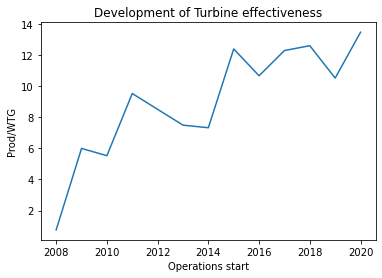

In [20]:
sns.lineplot(data=df1, x="Operations start", y="Prod/WTG")
plt.title("Development of Turbine effectiveness")
plt.show()

In [56]:
df2 = df.groupby("WTG supplier").sum()
df2

,# Turbines,Total height,Annual production (GWh),Operations start
WTG supplier,,,,
Nordex,67,1114,692.0,12097
Siemens,36,600,359.0,8052
Vestas,149,2174,1625.0,26193


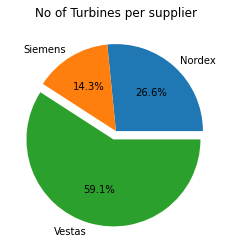

In [60]:
plt.pie(df2["# Turbines"], explode=(0,0,0.1), labels=["Nordex","Siemens","Vestas"], autopct='%1.1f%%')
plt.title("No of Turbines per supplier")
plt.show()

In [53]:
df_operation["Size category"] = pd.cut(df_operation["# Turbines"], bins=[0,10,30,100], labels=["Small","Medium","Large"])
df_operation

,Country,Project name,Municipality,# Turbines,Total height,Annual production (GWh),Operations start,Owner,WTG supplier,Size category
0,Sweden,Bondön,Piteå,7,125,NaN,2008,Fontavis,Nordex,Small
1,Sweden,Svegström (Brickan),Härjedalen,1,125,6.0,2008,Solivind El Ek för,Vestas,Small
2,Sweden,Råshön,Krokom,1,125,6.0,2009,Solivind El Ek för,Vestas,Small
3,Sweden,Hedbodberget,Rättvik,15,150,83.0,2010,"Armada kommunfastigheter, Botkyrkabyggen, Mora...",Vestas,Medium
4,Sweden,Brahehus,Jönköping,4,150,56.0,2011,Partillebo,Siemens,Small
5,Sweden,Korpfjället,Vansbro och Malung-Sälen,9,150,68.0,2011,IKEA,Siemens,Small
6,Sweden,Fallåsberget,Ockelbo,10,150,75.0,2013,"Solivind El Ekonomisk Förening, SGS Studentbos...",Siemens,Small
7,Sweden,Glötesvålen,Härjedalen,30,125,220.0,2014,IKEA,Vestas,Medium
8,Sweden,Rödstahöjden,Sollefteå,6,150,57.0,2015,"Finja Energi, Eskilstuna Vindkraft",Vestas,Small
9,Sweden,Rämsberget,Malung-Sälen,7,175,72.0,2015,IKEA,Vestas,Small


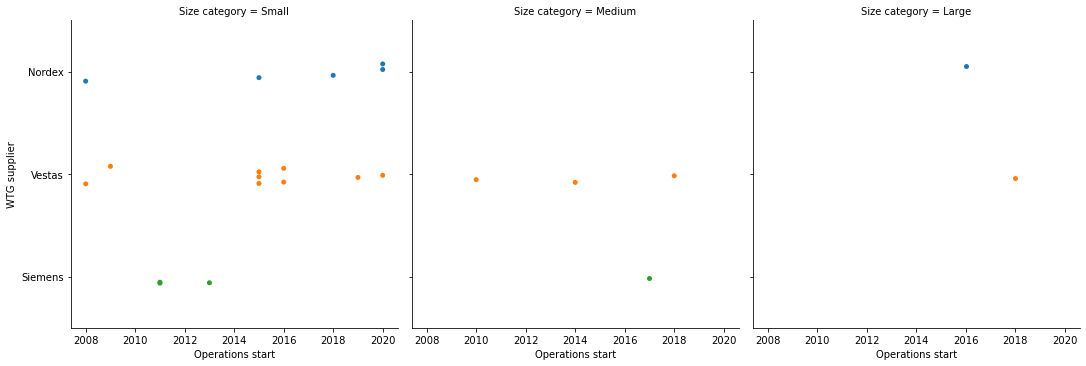

In [86]:
sns.catplot(data=df_operation, x="Operations start", y="WTG supplier", col="Size category")
plt.show()